# Data import and cleaning

Creating a data frame

In [1]:
import pandas as pd
import re

In [2]:
df = pd.read_csv('../data/realdonaldtrump.csv', index_col='date')

In [3]:
data = pd.DataFrame(df.content)

In [4]:
data

,content
date,
2009-05-04 13:54:25,Be sure to tune in and watch Donald Trump on L...
2009-05-04 20:00:10,Donald Trump will be appearing on The View tom...
2009-05-08 08:38:08,Donald Trump reads Top Ten Financial Tips on L...
2009-05-08 15:40:15,New Blog Post: Celebrity Apprentice Finale and...
2009-05-12 09:07:28,"""My persona will never be that of a wallflower..."
...,...
2020-04-15 10:37:20,"Our GREAT Senator from South Carolina, @ Senat..."
2020-04-15 10:39:58,# ThanksForDelivering @ UPS!https://twitter.co...
2020-04-15 10:48:05,"My condolences to the Steinbrenner family, and..."


## Cleaning

Prvo pretvorimo velika slova u mala

In [5]:
def cleaning(x):
    # mala slova:
    x = x.lower()
    
    # URL-ovi
    x = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', str(x))
    
    # specijalni znakovi
    x = re.sub(r'[\W]', ' ', str(x))
    
    # brojevi
    x = re.sub(r'\w*\d\w*', '', str(x))
    
    # razmaci 
    x = re.sub(r'\s+', ' ', str(x))
    return x

In [6]:
data = data.content.apply(cleaning)

In [7]:
data = pd.DataFrame(data)
data

,content
date,
2009-05-04 13:54:25,be sure to tune in and watch donald trump on l...
2009-05-04 20:00:10,donald trump will be appearing on the view tom...
2009-05-08 08:38:08,donald trump reads top ten financial tips on l...
2009-05-08 15:40:15,new blog post celebrity apprentice finale and ...
2009-05-12 09:07:28,my persona will never be that of a wallflower...
...,...
2020-04-15 10:37:20,our great senator from south carolina senatort...
2020-04-15 10:39:58,thanksfordelivering ups
2020-04-15 10:48:05,my condolences to the steinbrenner family and ...


## Sentiment analysis

In [8]:
from textblob import TextBlob

In [9]:
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity

In [10]:
data['polarity'] = data.content.apply(polarity)
data['subjectivity'] = data.content.apply(subjectivity)

In [11]:
data

,content,polarity,subjectivity
date,,,
2009-05-04 13:54:25,be sure to tune in and watch donald trump on l...,0.175000,0.497222
2009-05-04 20:00:10,donald trump will be appearing on the view tom...,0.136364,0.454545
2009-05-08 08:38:08,donald trump reads top ten financial tips on l...,0.105000,0.420000
2009-05-08 15:40:15,new blog post celebrity apprentice finale and ...,0.136364,0.454545
2009-05-12 09:07:28,my persona will never be that of a wallflower...,0.000000,0.000000
...,...,...,...
2020-04-15 10:37:20,our great senator from south carolina senatort...,0.261174,0.661553
2020-04-15 10:39:58,thanksfordelivering ups,0.000000,0.000000
2020-04-15 10:48:05,my condolences to the steinbrenner family and ...,0.400000,0.687500


## Plotting

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [15]:
data

,content,polarity,subjectivity
date,,,
2009-05-04 13:54:25,be sure to tune in and watch donald trump on l...,0.175000,0.497222
2009-05-04 20:00:10,donald trump will be appearing on the view tom...,0.136364,0.454545
2009-05-08 08:38:08,donald trump reads top ten financial tips on l...,0.105000,0.420000
2009-05-08 15:40:15,new blog post celebrity apprentice finale and ...,0.136364,0.454545
2009-05-12 09:07:28,my persona will never be that of a wallflower...,0.000000,0.000000
...,...,...,...
2020-04-15 10:37:20,our great senator from south carolina senatort...,0.261174,0.661553
2020-04-15 10:39:58,thanksfordelivering ups,0.000000,0.000000
2020-04-15 10:48:05,my condolences to the steinbrenner family and ...,0.400000,0.687500


In [29]:
data.polarity.rolling(window=5000).mean()

date
2009-05-04 13:54:25         NaN
2009-05-04 20:00:10         NaN
2009-05-08 08:38:08         NaN
2009-05-08 15:40:15         NaN
2009-05-12 09:07:28         NaN
                         ...   
2020-04-15 10:37:20    0.132682
2020-04-15 10:39:58    0.132671
2020-04-15 10:48:05    0.132781
2020-04-15 14:02:47    0.132735
2020-04-15 15:49:31    0.132735
Name: polarity, Length: 42295, dtype: float64

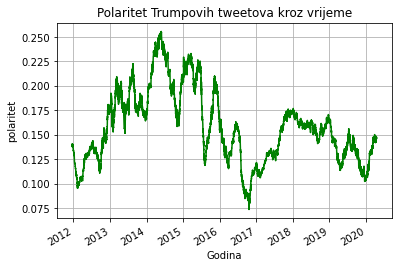

In [80]:
rolling = data.polarity.rolling(window=1000).mean()
rolling.index = pd.to_datetime(df.index)
fig = rolling.plot(grid=True, style='g-', title="Polaritet Trumpovih tweetova kroz vrijeme")
fig.set_xlabel("Godina")
fig.set_ylabel("polaritet")
fig.get_figure().savefig('../rad/polaritet.pdf')

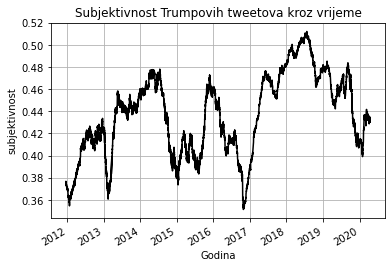

In [81]:
rolling = data.subjectivity.rolling(window=1000).mean()
rolling.index = pd.to_datetime(df.index)
fig = rolling.plot(grid=True, style='k-', title="Subjektivnost Trumpovih tweetova kroz vrijeme")
fig.set_xlabel("Godina")
fig.set_ylabel("subjektivnost")
fig.get_figure().savefig('../rad/subjektivnost.pdf')